In [2]:
import sys
sys.path.append("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Preprocessing")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import extractor
%matplotlib inline


In [3]:
df=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/mal_1.csv")

In [4]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


In [5]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [7]:
df["type"].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [8]:
#Removing Empty columns
df = df[pd.notnull(df['url'])]

In [9]:
#Encoding the Target Variable to a new column
df['type']=df['type'].replace({'phishing':1,'benign':0,'defacement':1,'malware':1})

In [15]:
#Removing Unwanted Characters from the URL
# df['url']=df['url'].map(clean)
#print(extractor.clean("hi"))

AttributeError: 'function' object has no attribute 'encode'

In [ ]:
df.head()

<AxesSubplot:xlabel='type', ylabel='count'>

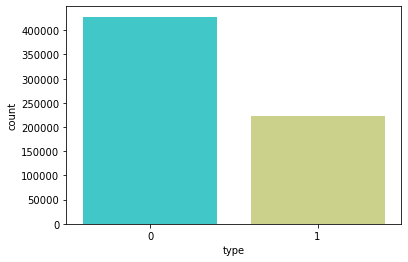

In [ ]:
sns.countplot(x='type',data=df, palette='rainbow')

In [ ]:
df.head(200)

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
195,cardomain.com/ride/2424103/2006-pontiac-gto,0
196,apps.facebook.com/ilike/artist/Les+Respectables,0
197,cbssports.com/nba/players/playerpage/20626/pau...,0
198,detkreimeier-fotografie.de,1


In [ ]:
X=df['url']
Y=df['type']

In [ ]:
df["type"].unique()

array([1, 0])

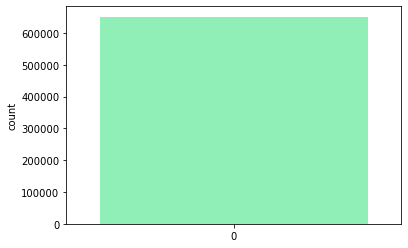

In [ ]:
sns.countplot(data=df['type'], palette='rainbow')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [ ]:
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
        ]